<a href="https://colab.research.google.com/github/alesriram/traffic-flow-prediction/blob/main/Linear_Regression_with_one_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [9]:
#data genrate X,y
def generateDataset(m):
  X = np.random.randn(m)*10
  noise = np.random.randn(m)
  y = 3*X + 1 + 5*noise
  return X,y

In [10]:
X,y = generateDataset(100)
print(X.shape,y.shape)

(100,) (100,)


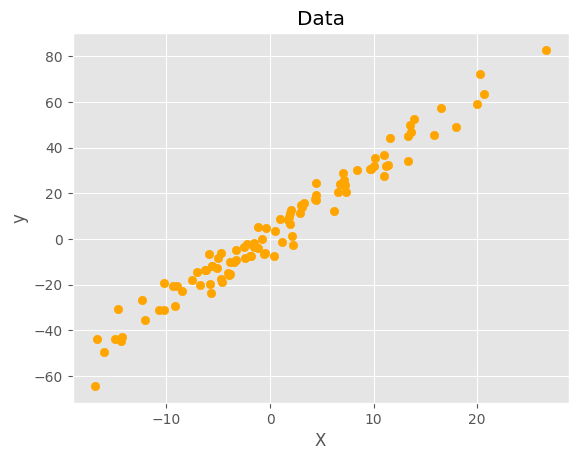

In [11]:
def plotData(X,y,color='orange',title='Data'):
  plt.title(title)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.scatter(X,y,c=color)
  plt.show()

plotData(X,y)

In [12]:
def normaliseData(X):
  X = (X-X.mean())/X.std()
  return X

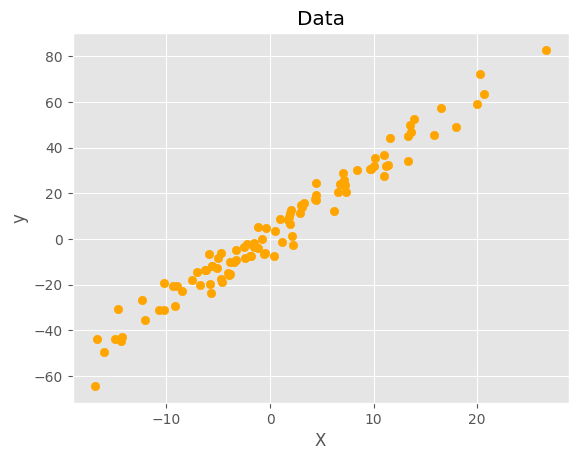

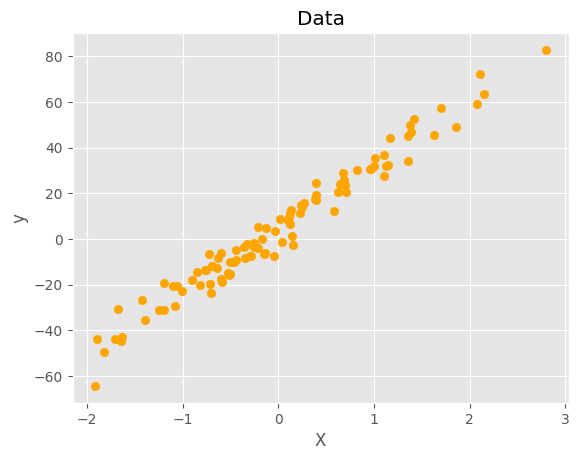

In [13]:
plotData(X,y)
X = normaliseData(X)
plotData(X,y)

In [14]:
def trainTestSplit(X,y, split= 0.8):
  m = X.shape[0]
  data = np.zeros((m,2))
  data[:,0] = X
  data[:,1] = y
  np.random.shuffle(data)

  split = int(m*split)
  XT = data[:split, 0]
  yT = data[:split, 1]
  Xt = data[split:, 0]
  yt = data[split:, 1]

  return XT, yT, Xt, yt


In [15]:
XT,yT,Xt,yt = trainTestSplit(X,y)
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


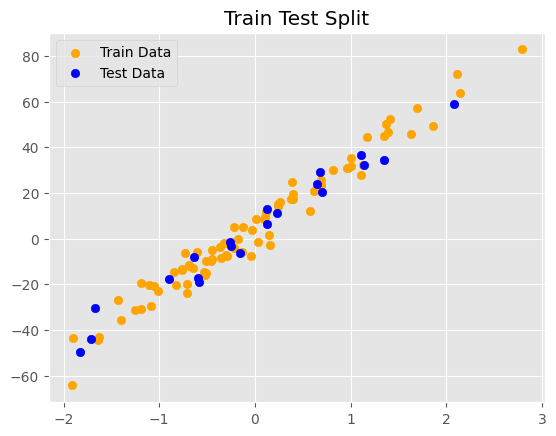

In [16]:
plt.scatter(XT,yT,color='orange',label='Train Data')
plt.scatter(Xt,yt,color='blue',label='Test Data')
plt.legend()
plt.title('Train Test Split')
plt.show()

In [46]:
#hypothesis
def hypothesis(X,theta):
  return theta[0] + theta[1]*X

def error(X,y,theta):
  m = X.shape[0]
  e = 0
  for i in range(m):
    y_i = hypothesis(X[i],theta)
    e = e + (y_i - y[i])**2
  return e/(2*m)

def gradient(X,y,theta):
  m = X.shape[0]
  grad = np.zeros((2,))

  for i in range(m):
    exp = hypothesis(X[i],theta) - y[i]
    grad[0] = grad[0] + exp
    grad[1] = grad[1] + exp * X[i]
  return grad/m

def train(X,y,learning_rate= 0.1, maxItrs = 100):
  theta = np.zeros((2,))
  error_list = []
  for i in range(maxItrs):
    grad = gradient(X,y,theta)
    error_list.append(error(X,y,theta))
    theta[0] = theta[0] - learning_rate*grad[0]
    theta[1] = theta[1] - learning_rate*grad[1]

  plt.xlabel('Itrs')
  plt.ylabel('Error')
  plt.plot(error_list)
  return theta



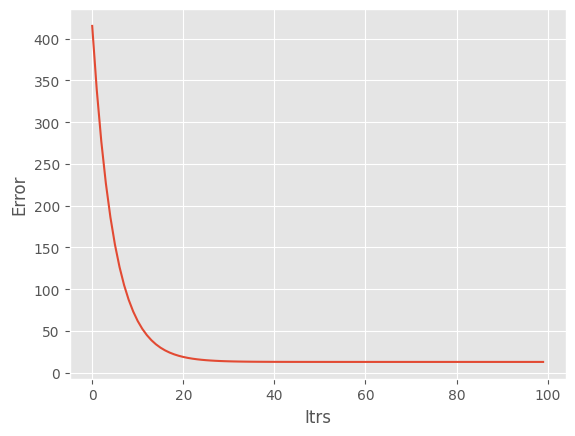

In [47]:
theta = train(X,y)

In [48]:
theta

array([ 4.64521218, 27.98834586])

In [49]:
def predict (X,theta):
  return hypothesis(X,theta)

In [51]:
yt = predict(Xt,theta)

In [52]:
yt.shape

(20,)

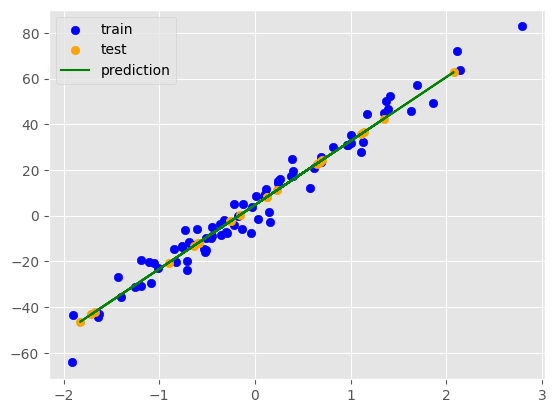

In [59]:
plt.scatter(XT,yT,color='blue',label='train')
plt.scatter(Xt,yt,color='orange',label='test')
plt.plot(Xt,yt,color='green',label='prediction')
plt.legend()
plt.show()


In [63]:
def r2score(y,yp):
  ymean =y.mean()
  num = np.sum((y-yp)**2)
  den = np.sum((y-ymean)**2)
  return 1 - num/den

r2score(yt,yp)

-0.9798506936523621